# Project 2: predicting sales prices with the Aimes Iowa Housing dataset

## Problem Statement

ABC Real Estate Agents needs a way to predict property sales prices so they may give potential customers a reliable estimate of the value of their property before they decide to engage them to find a buyer.

Currently, 50% of customers express dissatisfaction when the price potential buyers the company finds for their property to be much lower than the price estimates of the company's agents, sometimes resulting in wasted time for the company's agents when sellers change their minds about selling their properties. While such disappointments can be avoided by giving lower property price estimates, there is industry pressure to give a high valuation estimate as it gives sellers the impression that the agent is skilled.

Using data science to come up with a more reliable property price estimate, we can potentially increase customer satisfaction while quoting prices that are competitive in the industry.

## Data Import and Cleaning

Done in python file \project_2\code\01_data_cleaning.py

## Exploratory Data Analysis

#### 1. Read In Data

Read in the data.

In [1]:
from python_imports import *

%matplotlib inline

In [2]:
# Load data.
import_path = r'..\datasets\clean_train.csv'
# Dataset contains NA strings that should not be considered null values.
data = pd.read_csv(import_path, keep_default_na=False, na_values=[''])

import_path = r'..\datasets\clean_test.csv'
# Dataset contains NA strings that should not be considered null values.
data2 = pd.read_csv(import_path, keep_default_na=False, na_values=[''])

In [3]:
# Separate the target variable from the dataset.
df_target = data['saleprice']

In [4]:
features = [x for x in data.columns if x != 'saleprice']
# Join train and test datasets in preparation for preprocessing.
df_features = data[features].append(data2)

In [5]:
# Confirm join is successful. Since join='outer', nulls will be present if the DataFrames were not joined correctly.
np.sum(df_features.isnull().sum())

0

In [6]:
df_features.shape

(2901, 77)

In [7]:
df_features.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_cars', 'garage

In [8]:
# Convert ordinal values to numbers.
ordinal_vars = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
ordinal_vars = [x.lower().replace(' ', '_') for x in ordinal_vars]

In [9]:
ordinal_values = [
    ['IR3', 'IR2', 'IR1', 'Reg'],
    ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    ['Sev', 'Mod', 'Gtl'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'No', 'Mn', 'Av', 'Gd'],
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Unf', 'RFn', 'Fin'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['N', 'P', 'Y'],
    ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
]

In [10]:
ordinals = zip(ordinal_vars, ordinal_values)

In [11]:
ordinal_map = {k: v for k, v in ordinals}
ordinal_map

{'lot_shape': ['IR3', 'IR2', 'IR1', 'Reg'],
 'utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'land_slope': ['Sev', 'Mod', 'Gtl'],
 'exter_qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'exter_cond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'bsmt_qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'bsmt_cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'bsmt_exposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
 'bsmtfin_type_1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'bsmtfin_type_2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'heating_qc': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
 'kitchen_qual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'fireplace_qu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'garage_finish': ['NA', 'Unf', 'RFn', 'Fin'],
 'garage_qual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'garage_cond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'paved_drive': ['N', 'P', 'Y'],
 'p

In [12]:
df_ord = ordinal_scale(df_features, ordinal_map)

In [13]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']
nominal = [x.lower().replace(' ', '_') for x in nominal]

In [14]:
non_norminal = [x for x in df_features if x not in nominal]

In [15]:
df_features[non_norminal].shape

(2901, 55)

In [16]:
# Eliminate features with a Variance Inflation Factor of more than 5.0, as these are highly correlated with each other.
dropped_features = vif_feature_select(df_features[non_norminal], drop_list=True)

returning list of dropped features.


In [17]:
dropped_features

['bsmtfin_sf_1', 'garage_cond', 'total_bsmt_sf', 'garage_cars', 'year_built']

In [18]:
df_features.drop(dropped_features, axis=1, inplace=True)

In [19]:
df_features.shape

(2901, 72)

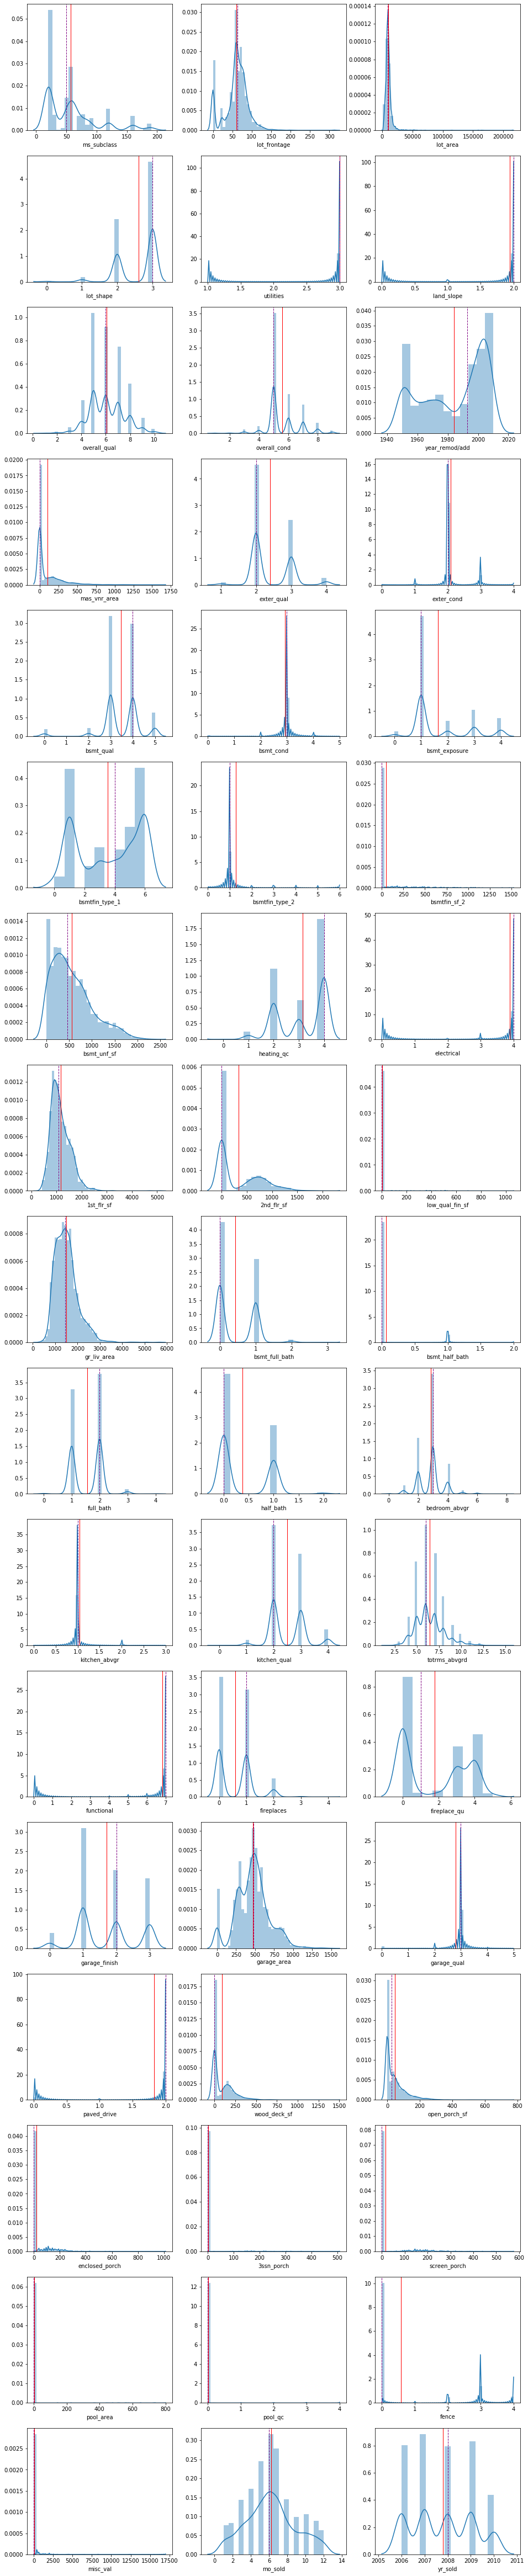

In [20]:
# Visualize continuous and ordinal variables.
subplot_dist(df_features, meanline=True, medianline=True)

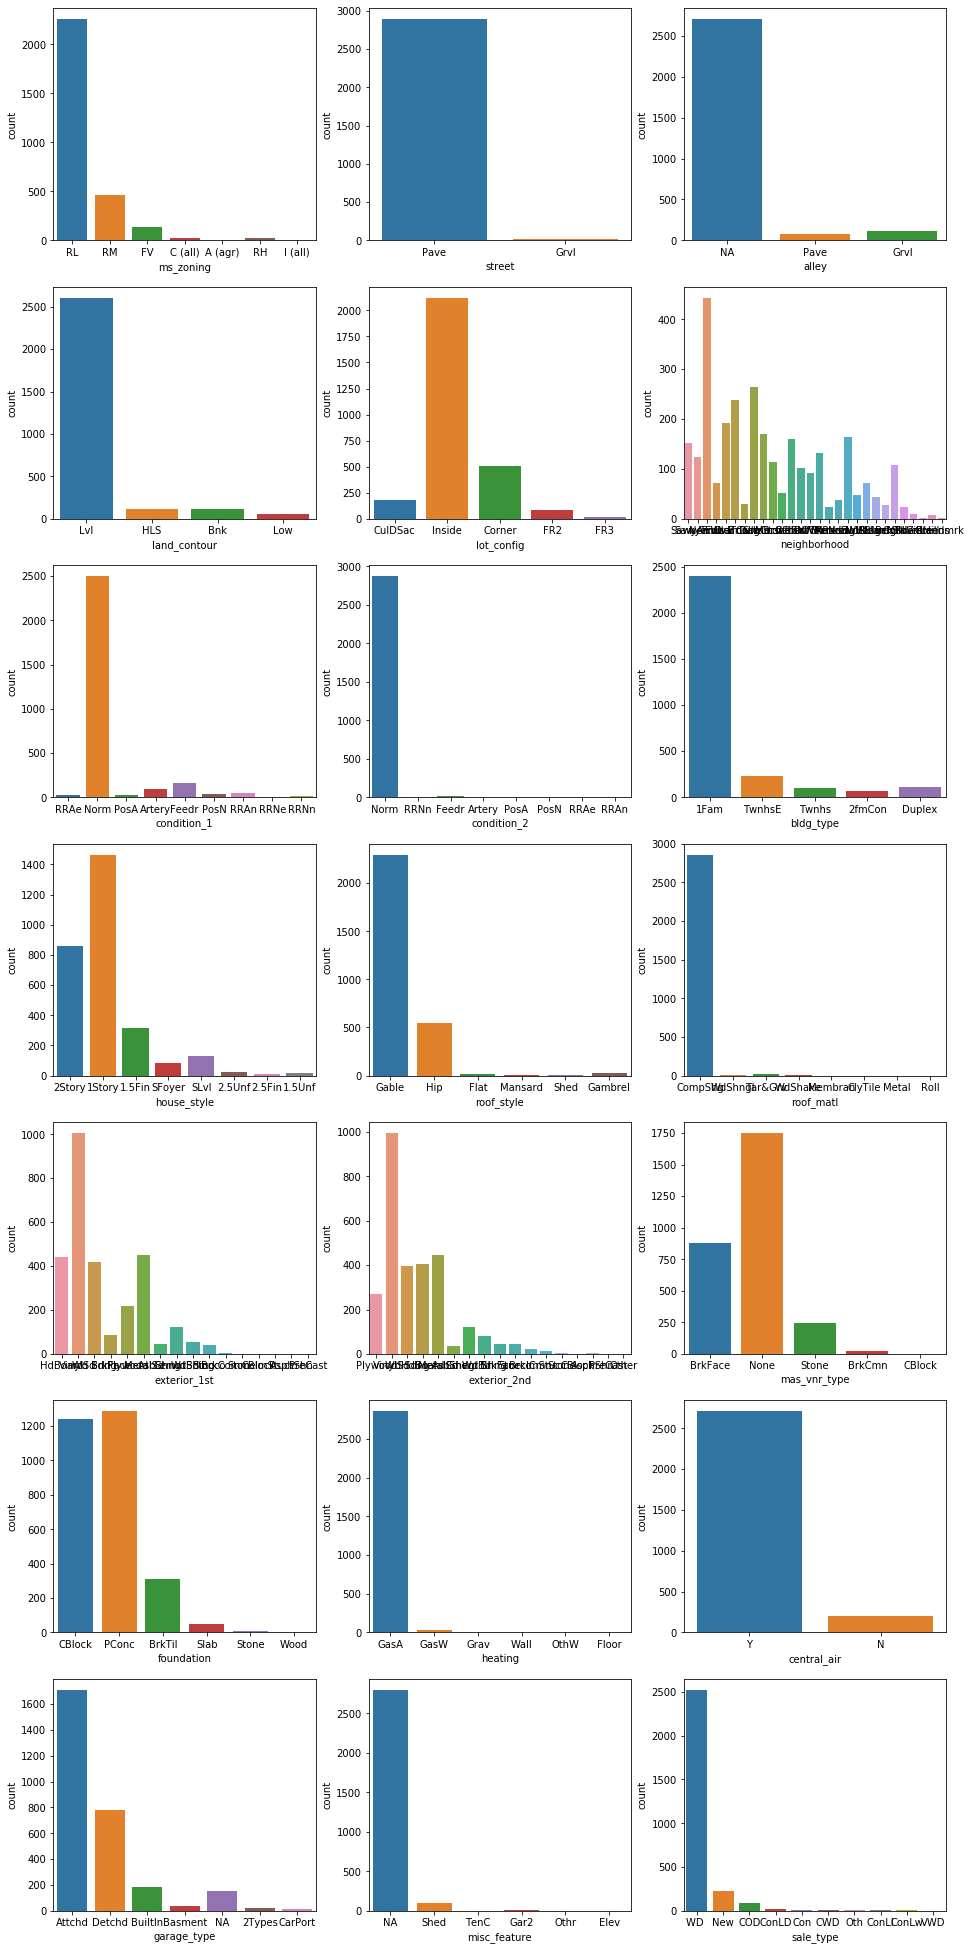

In [21]:
# Visualize categorical variables.
subplot_dist(df_features, kind='count')

In [22]:
df_features.describe()

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,mas_vnr_area,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold
count,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,...,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000
mean,57.502585,60.807000,10128.736643,2.599104,2.998621,1.945881,6.085832,5.567391,1984.092727,101.912345,...,47.178559,23.030679,2.618407,16.162013,2.265770,0.012410,0.583247,51.141331,6.209583,2007.792485
std,42.737092,30.428167,7873.652972,0.570166,0.045465,0.249484,1.409772,1.114184,20.859531,179.205102,...,67.051004,64.158318,25.265382,56.344164,35.774013,0.197879,1.219546,569.146217,2.712333,1.318185
min,20.000000,0.000000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,50.000000,7424.000000,2.000000,3.000000,2.000000,5.000000,5.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,63.000000,9428.000000,3.000000,3.000000,2.000000,6.000000,5.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11515.000000,3.000000,3.000000,2.000000,7.000000,6.000000,2004.000000,164.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,3.000000,3.000000,2.000000,10.000000,9.000000,2010.000000,1600.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,4.000000,4.000000,17000.000000,12.000000,2010.000000


In [23]:
# Convert nominal features into dummies.
df_dum = pd.get_dummies(data=df_features, columns=nominal, drop_first=True)

In [24]:
df_dum.shape

(2901, 212)

## Model Preparation

#### 1. Scaling

In [25]:
ss = skpp.StandardScaler()
df_ss = pd.DataFrame(ss.fit_transform(df_dum), columns=df_dum.columns)

#### 2. Tain test split

In [26]:
y_train = df_target

In [27]:
X_train = df_ss[:data.shape[0]]
X_test = df_ss[data.shape[0]:]

#### 3. Instantiate models

In [28]:
lr = sklm.LinearRegression()
lasso = sklm.LassoCV(n_alphas=200, cv=5)
ridge = sklm.RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross Validation

In [29]:
lr_scores = skms.cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-1.4488525258824868e+22

In [30]:
lasso_scores = skms.cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

0.8597750193270584

In [31]:
ridge_scores = skms.cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.8501436449259041

## Model Fitting and Evaluation

In [32]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [33]:
lasso.score(X_train, y_train)

0.8956396764102929

In [34]:
pred = lasso.predict(X_test)

In [35]:
pred

array([130335.79116641, 163296.72358577, 228511.49192302, 112692.17347009,
       187758.97223285,  81332.1218118 ,  98394.53966558, 160039.70162632,
       177284.05371118, 160474.15903442, 148111.54376758, 121274.77549013,
       147957.42129526, 267256.04799148, 151470.91065642, 124437.72136158,
       166448.94799022, 118564.0022023 , 193117.43924604, 194408.0503726 ,
       156351.70314772, 122495.149902  , 179701.46205632, 158959.65066605,
       179535.94357531, 121416.50243365, 136376.85106972, 137512.33351202,
       168543.68305062,  22684.4415349 , 101562.36701158, 101701.353241  ,
       199636.39337833, 150482.79981891, 227481.58095656, 177308.51412201,
       111556.59704785,  69841.47048835, 144465.03138166, 200450.54454467,
       171395.02256392, 204660.65566028, 154968.0960735 , 164199.78336029,
       211939.54485971,  92742.86514356, 227528.8506101 , 123395.80546465,
       133304.01782559, 113225.65739343,  99662.5675194 , 218992.00794217,
       239716.86183442, 1

In [36]:
# Load data.
import_path = r'..\datasets\test.csv'
# Dataset contains NA strings that should not be considered null values.
data3 = pd.read_csv(import_path, keep_default_na=False, na_values=[''])

In [37]:
data3.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [38]:
df_submit = pd.concat([data3['Id'], pd.DataFrame(pred)], axis=1)

In [39]:
df_submit.columns = ['Id', 'SalePrice']

In [40]:
export_path = r'..\datasets\submission.csv'
df_submit.to_csv(export_path, index=False)

In [41]:
lasso.coef_

array([ 0.00000000e+00,  2.86958505e+03,  0.00000000e+00,  6.03601134e+01,
       -0.00000000e+00,  1.40140262e+04,  2.41202419e+03,  1.41141698e+03,
        4.16736291e+03,  6.08318969e+03,  0.00000000e+00,  3.11376879e+03,
       -3.70705638e+01,  5.15055313e+03,  3.16969130e+03, -0.00000000e+00,
        0.00000000e+00, -1.82602754e+03,  1.32257001e+03, -0.00000000e+00,
        5.77096636e+03,  0.00000000e+00, -0.00000000e+00,  1.98305763e+04,
        3.19900131e+03, -0.00000000e+00,  1.81209433e+03,  8.89987933e+02,
       -0.00000000e+00, -1.30236772e+03,  6.03298770e+03,  3.46635057e+02,
        2.01016009e+03,  1.88553506e+03,  2.20284019e+03,  6.18944506e+02,
        5.17935474e+03, -0.00000000e+00,  0.00000000e+00,  1.67777672e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.62064420e+03,
       -0.00000000e+00, -2.40906958e+03,  0.00000000e+00, -6.84055018e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [42]:
coeff_names = {k: v for k, v in zip(X_train, lasso.coef_)}

In [43]:
coeff_names

{'lot_frontage': 0.0,
 'lot_area': 2869.585053818533,
 'lot_shape': 0.0,
 'utilities': 60.36011341454302,
 'land_slope': -0.0,
 'overall_qual': 14014.026208796227,
 'overall_cond': 2412.0241938976587,
 'year_remod/add': 1411.4169792913412,
 'mas_vnr_area': 4167.362909443754,
 'exter_qual': 6083.18969119687,
 'exter_cond': 0.0,
 'bsmt_qual': 3113.7687930242696,
 'bsmt_cond': -37.07056375689175,
 'bsmt_exposure': 5150.553126621268,
 'bsmtfin_type_1': 3169.6912982238646,
 'bsmtfin_type_2': -0.0,
 'bsmtfin_sf_2': 0.0,
 'bsmt_unf_sf': -1826.0275374364294,
 'heating_qc': 1322.5700062480964,
 'electrical': -0.0,
 '1st_flr_sf': 5770.9663567551615,
 '2nd_flr_sf': 0.0,
 'low_qual_fin_sf': -0.0,
 'gr_liv_area': 19830.576339300584,
 'bsmt_full_bath': 3199.001306043703,
 'bsmt_half_bath': -0.0,
 'full_bath': 1812.0943298680372,
 'half_bath': 889.9879332216759,
 'bedroom_abvgr': -0.0,
 'kitchen_abvgr': -1302.367719075781,
 'kitchen_qual': 6032.987702299065,
 'totrms_abvgrd': 346.635057006163,
 'func

In [44]:
coeff_names = {k: v for k, v in coeff_names.items() if v > 0}

In [45]:
df_coeff = pd.DataFrame(coeff_names, index=['coefficient'])

In [46]:
df_coeff

,lot_area,utilities,overall_qual,overall_cond,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_exposure,bsmtfin_type_1,...,exterior_2nd_VinylSd,mas_vnr_type_Stone,foundation_PConc,foundation_Slab,garage_type_BuiltIn,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,sale_type_Con,sale_type_New
coefficient,2869.585054,60.360113,14014.026209,2412.024194,1411.416979,4167.362909,6083.189691,3113.768793,5150.553127,3169.691298,...,311.85728,208.324788,1886.385246,99.896146,173.529135,2951.419471,2281.522946,589.806076,998.671497,3503.865992


In [47]:
df_coeff = df_coeff.T

In [48]:
df_coeff = df_coeff.sort_values(by=['coefficient'], ascending=False)

In [50]:
df_coeff

,coefficient
gr_liv_area,19830.576339
overall_qual,14014.026209
neighborhood_NridgHt,9097.734715
neighborhood_StoneBr,6096.997128
exter_qual,6083.189691
kitchen_qual,6032.987702
1st_flr_sf,5770.966357
garage_area,5179.354744
bsmt_exposure,5150.553127
neighborhood_NoRidge,4234.499662


In [49]:
export_path = r'..\datasets\model_coefficients.csv'
df_coeff.to_csv(export_path, index=True)